In [11]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import datetime as dt

In [12]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2022, 1, 13)

In [113]:
apple_df = web.DataReader('AAPL', 'yahoo', start, end)
apple_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.553024
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.564354
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.459941
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.447998
2010-01-08,7.571429,7.466429,7.510714,7.570714,447610800.0,6.490865
...,...,...,...,...,...,...
2022-01-07,174.139999,171.029999,172.889999,172.169998,86580100.0,172.169998
2022-01-10,172.500000,168.169998,169.080002,172.190002,106606900.0,172.190002
2022-01-11,175.179993,170.820007,172.320007,175.080002,76138300.0,175.080002


In [114]:
%%time
apple_close = apple_df['Close']
apple_close = apple_close.shift(1)
apple_open = apple_df['Open']
apple_overnight = pd.concat([apple_close, apple_open], axis = 1)
apple_overnight['pct_change'] = (apple_overnight['Open'] - apple_overnight['Close'])/apple_overnight['Close']
apple_overnight['cum_prod_o'] = apple_overnight[['pct_change']].apply(lambda x: (x + 1).cumprod())
apple_overnight

Wall time: 10.3 ms


,Close,Open,pct_change,cum_prod_o
Date,,,,
2010-01-04,NaN,7.622500,NaN,NaN
2010-01-05,7.643214,7.664286,0.002757,1.002757
2010-01-06,7.656429,7.656429,0.000000,1.002757
2010-01-07,7.534643,7.562500,0.003697,1.006464
2010-01-08,7.520714,7.510714,-0.001330,1.005126
...,...,...,...,...
2022-01-07,172.000000,172.889999,0.005174,13.804662
2022-01-10,172.169998,169.080002,-0.017947,13.556904
2022-01-11,172.190002,172.320007,0.000755,13.567140


In [117]:
%%time
apple_intraday = apple_df[['Open', 'Close']].copy()
apple_intraday['pct_change'] = (apple_intraday['Close'] - apple_intraday['Open'])/apple_intraday['Open']
apple_intraday['cum_prod_i'] = apple_intraday[['pct_change']].apply(lambda x: (x + 1).cumprod())
apple_intraday

Wall time: 6.98 ms


,Open,Close,pct_change,cum_prod_i
Date,,,,
2010-01-04,7.622500,7.643214,0.002718,1.002718
2010-01-05,7.664286,7.656429,-0.001025,1.001690
2010-01-06,7.656429,7.534643,-0.015906,0.985756
2010-01-07,7.562500,7.520714,-0.005525,0.980310
2010-01-08,7.510714,7.570714,0.007989,0.988141
...,...,...,...,...
2022-01-07,172.889999,172.169998,-0.004165,1.636192
2022-01-10,169.080002,172.190002,0.018394,1.666288
2022-01-11,172.320007,175.080002,0.016017,1.692976


In [118]:
apple = pd.concat([apple_overnight['cum_prod_o'], apple_intraday['cum_prod_i']], axis = 1)
apple = apple.dropna(0)
apple

C:\Users\jackm\AppData\Local\Temp/ipykernel_23988/1091821.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  apple = apple.dropna(0)


,cum_prod_o,cum_prod_i
Date,,
2010-01-05,1.002757,1.001690
2010-01-06,1.002757,0.985756
2010-01-07,1.006464,0.980310
2010-01-08,1.005126,0.988141
2010-01-11,1.009014,0.975650
...,...,...
2022-01-07,13.804662,1.636192
2022-01-10,13.556904,1.666288
2022-01-11,13.567140,1.692976


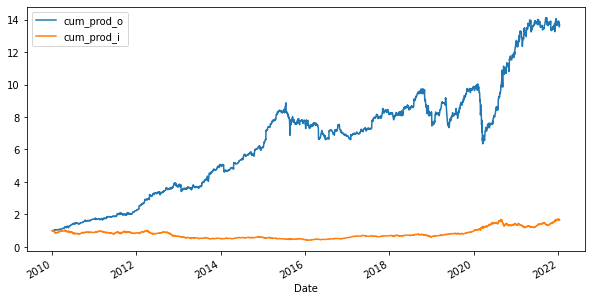

In [119]:
apple.plot(figsize = [10, 5]);

# S&P 500 Components

In [7]:
# https://datahub.io/core/s-and-p-500-companies
df = pd.read_csv('constituents_csv.csv')[['Symbol']]
df

,Symbol
0,MMM
1,AOS
2,ABT
3,ABBV
4,ABMD
...,...
500,YUM
501,ZBRA
502,ZBH
503,ZION


In [8]:
%%time
dic = {}
for ticker in df['Symbol']:
    dic["{}".format(ticker)] = web.DataReader(ticker, 'yahoo', start, end)[['Open', 'Close']]
dic

Wall time: 20min 6s


{'MMM':                   Open       Close
 Date                              
 2010-01-04   83.089996   83.019997
 2010-01-05   82.800003   82.500000
 2010-01-06   83.879997   83.669998
 2010-01-07   83.320000   83.730003
 2010-01-08   83.690002   84.320000
 ...                ...         ...
 2022-01-07  178.130005  179.949997
 2022-01-10  179.449997  177.410004
 2022-01-11  178.000000  178.979996
 2022-01-12  179.000000  179.419998
 2022-01-13  179.880005  181.020004
 
 [3030 rows x 2 columns],
 'AOS':                  Open      Close
 Date                            
 2010-01-04   7.295000   7.435000
 2010-01-05   7.431667   7.340000
 2010-01-06   7.335000   7.343333
 2010-01-07   7.356667   7.365000
 2010-01-08   7.331667   7.473333
 ...               ...        ...
 2022-01-07  84.330002  83.150002
 2022-01-10  82.959999  82.889999
 2022-01-11  83.419998  83.699997
 2022-01-12  84.239998  83.980003
 2022-01-13  84.099998  82.940002
 
 [3030 rows x 2 columns],
 'ABT':             

In [29]:
sp_open_close = pd.concat(dic, axis = 1)
sp_open_close

MMM                    AOS                    ABT  \
                  Open       Close       Open      Close        Open   
Date                                                                   
2010-01-04   83.089996   83.019997   7.295000   7.435000   26.000362   
2010-01-05   82.800003   82.500000   7.431667   7.340000   26.134706   
2010-01-06   83.879997   83.669998   7.335000   7.343333   25.880411   
2010-01-07   83.320000   83.730003   7.356667   7.365000   26.057938   
2010-01-08   83.690002   84.320000   7.331667   7.473333   26.273848   
...                ...         ...        ...        ...         ...   
2022-01-07  178.130005  179.949997  84.330002  83.150002  134.880005   
2022-01-10  179.449997  177.410004  82.959999  82.889999  134.789993   
2022-01-11  178.000000  178.979996  83.419998  83.699997  135.229996   
2022-01-12  179.000000  179.419998  84.239998  83.980003  134.889999   
2022-01-13  179.880005  181.020004  84.099998  82.940002  132.389999   

                              ABBV                    ABMD              ...  \
                 Close        Open       Close        Open       Close  ...   
Date                                                                    ...   
2010-01-04   26.129908         NaN         NaN    8.860000    8.740000  ...   
2010-01-05   25.918797         NaN         NaN    8.740000    8.530000  ...   
2010-01-06   26.062737         NaN         NaN    8.520000    8.400000  ...   
2010-01-07   26.278646         NaN         NaN    8.630000    8.400000  ...   
2010-01-08   26.412991         NaN         NaN    8.380000    8.230000  ...   
...                ...         ...         ...         ...         ...  ...   
2022-01-07  135.559998  135.250000  134.880005  334.790009  319.279999  ...   
2022-01-10  135.259995  135.080002  136.389999  312.540009  306.799988  ...   
2022-01-11  135.699997  135.850006  136.970001  307.179993  319.100006  ...   
2022-01-12  133.720001  136.520004  137.289993  319.589996  315.429993  ...   
2022-01-13  129.649994  135.000000  133.520004  316.799988  306.790009  ...   

                   YUM                    ZBRA                     ZBH  \
                  Open       Close        Open       Close        Open   
Date                                                                     
2010-01-04   25.248022   25.226456   28.469999   28.670000   59.310001   
2010-01-05   25.248022   25.140186   28.549999   28.620001   61.320000   
2010-01-06   25.125809   24.960461   27.410000   28.400000   62.060001   
2010-01-07   24.852625   24.953272   28.230000   27.690001   62.849998   
2010-01-08   24.946081   24.960461   27.580000   27.600000   61.810001   
...                ...         ...         ...         ...         ...   
2022-01-07  136.360001  135.350006  552.140015  530.859985  127.199997   
2022-01-10  134.759995  133.460007  527.369995  535.409973  127.339996   
2022-01-11  133.119995  130.660004  535.150024  538.570007  127.570000   
2022-01-12  131.110001  129.149994  539.969971  538.440002  128.059998   
2022-01-13  129.289993  128.809998  539.820007  525.799988  126.180000   

                             ZION                    ZTS              
                 Close       Open      Close        Open       Close  
Date                                                                  
2010-01-04   60.020000  12.940000  13.330000         NaN         NaN  
2010-01-05   61.919998  13.280000  13.800000         NaN         NaN  
2010-01-06   61.900002  13.670000  15.000000         NaN         NaN  
2010-01-07   63.320000  14.970000  16.680000         NaN         NaN  
2010-01-08   61.990002  16.190001  16.410000         NaN         NaN  
...                ...        ...        ...         ...         ...  
2022-01-07  128.149994  69.180000  70.089996  217.130005  211.089996  
2022-01-10  126.900002  70.680000  69.559998  208.119995  212.600006  
2022-01-11  128.380005  70.120003  70.220001  212.000000  212.800003  
2022-01-12  12

In [30]:
sp_open_close.to_csv('sp_open_close.csv')

In [71]:
a = 0
b = 505

In [72]:
%%time
sp_overnight = pd.DataFrame(index = ['Overnight'])
for i in range(a, b):
    ov_close = sp_open_close[df['Symbol'][i]][['Close']]
    ov_close = ov_close.shift(1)
    ov_open = sp_open_close[df['Symbol'][i]][['Open']]
    overnight = pd.concat([ov_close, ov_open], axis = 1)
    overnight['pct_change'] = (overnight['Open'] - overnight['Close'])/overnight['Close']
    overnight['cum_prod_o'] = overnight[['pct_change']].apply(lambda x: (x + 1).cumprod())
    sp_overnight[df['Symbol'][i]] = overnight['cum_prod_o'].iloc[-1]
    sp_overnight = sp_overnight.copy()
sp_overnight

Wall time: 6.11 s


,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Overnight,1.389798,5.491111,1.990898,1.697083,3.482839,0.592203,7.252331,1.857166,2.886989,3.929655,...,0.437121,13.149202,0.791589,1.585341,2.829998,1.555747,3.771231,1.13058,3.378576,4.623074


In [73]:
%%time
sp_intraday = pd.DataFrame(index = ['Intraday'])
for i in range(a, b):
    in_open = sp_open_close[df['Symbol'][i]][['Open']]
    in_close = sp_open_close[df['Symbol'][i]][['Close']]
    intraday = pd.concat([in_open, in_close], axis = 1)
    intraday['pct_change'] = (intraday['Close'] - intraday['Open'])/intraday['Open']
    intraday['cum_prod_i'] = intraday[['pct_change']].apply(lambda x: (x + 1).cumprod())
    sp_intraday[df['Symbol'][i]] = intraday['cum_prod_i'].iloc[-1]
    sp_intraday = sp_intraday.copy()
sp_intraday

Wall time: 6.02 s


,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Intraday,1.567568,2.070516,2.504633,2.253041,9.942007,14.696839,0.787906,1.212721,4.885257,1.508845,...,7.472851,0.1046,4.07819,4.762707,1.720473,3.279315,4.897224,1.909934,1.602515,1.421441


In [112]:
%%time
sp_total = pd.DataFrame(index = ['Total'])
for i in range(a, b):
    total = sp_open_close[df['Symbol'][i]]
    if pd.isnull(total['Open'][0]) == True:
        open1 = total['Open'].loc[total[['Open']].first_valid_index()]
    else:
        open1 = total['Open'][0]
    returns = (total['Close'][-1] - open1)/open1
    sp_total[df['Symbol'][i]] = returns
    sp_total = sp_total.copy()
sp_total

Wall time: 852 ms


,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Total,1.178602,10.369431,3.986469,2.823597,33.626413,7.703516,4.714159,1.252224,13.103684,4.929238,...,2.266542,0.375408,2.228251,6.550513,3.868936,4.101786,17.468563,1.159332,4.414219,5.571429


In [75]:
sp_com = sp_overnight.append([sp_intraday, sp_total])
sp_com

,MMM,AOS,ABT,ABBV,ABMD,ACN,ATVI,ADM,ADBE,AAP,...,WLTW,WYNN,XEL,XLNX,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Overnight,1.389798,5.491111,1.990898,1.697083,3.482839,0.592203,7.252331,1.857166,2.886989,3.929655,...,0.437121,13.149202,0.791589,1.585341,2.829998,1.555747,3.771231,1.130580,3.378576,4.623074
Intraday,1.567568,2.070516,2.504633,2.253041,9.942007,14.696839,0.787906,1.212721,4.885257,1.508845,...,7.472851,0.104600,4.078190,4.762707,1.720473,3.279315,4.897224,1.909934,1.602515,1.421441
Total,1.178602,10.369431,3.986469,2.823597,33.626413,7.703516,4.714159,1.252224,13.103684,4.929238,...,2.266542,0.375408,2.228251,6.550513,3.868936,4.101786,17.468563,1.159332,4.414219,5.571429


In [76]:
sp_com = sp_com.transpose()
sp_com

,Overnight,Intraday,Total
MMM,1.389798,1.567568,1.178602
AOS,5.491111,2.070516,10.369431
ABT,1.990898,2.504633,3.986469
ABBV,1.697083,2.253041,2.823597
ABMD,3.482839,9.942007,33.626413
...,...,...,...
YUM,1.555747,3.279315,4.101786
ZBRA,3.771231,4.897224,17.468563
ZBH,1.130580,1.909934,1.159332
ZION,3.378576,1.602515,4.414219


In [77]:
sp_com['O_bigger'] = np.where(sp_com['Overnight'] > sp_com['Intraday'], 'True', 'False')
sp_com

,Overnight,Intraday,Total,O_bigger
MMM,1.389798,1.567568,1.178602,False
AOS,5.491111,2.070516,10.369431,True
ABT,1.990898,2.504633,3.986469,False
ABBV,1.697083,2.253041,2.823597,False
ABMD,3.482839,9.942007,33.626413,False
...,...,...,...,...
YUM,1.555747,3.279315,4.101786,False
ZBRA,3.771231,4.897224,17.468563,False
ZBH,1.130580,1.909934,1.159332,False
ZION,3.378576,1.602515,4.414219,True


In [78]:
sp_com.O_bigger.value_counts()

True     270
False    235
Name: O_bigger, dtype: int64

In [80]:
sp_com['O_vs_Total'] = np.where(sp_com['Overnight'] > sp_com['Total'], 'True', 'False')
sp_com

,Overnight,Intraday,Total,O_bigger,O_vs_Total
MMM,1.389798,1.567568,1.178602,False,True
AOS,5.491111,2.070516,10.369431,True,False
ABT,1.990898,2.504633,3.986469,False,False
ABBV,1.697083,2.253041,2.823597,False,False
ABMD,3.482839,9.942007,33.626413,False,False
...,...,...,...,...,...
YUM,1.555747,3.279315,4.101786,False,False
ZBRA,3.771231,4.897224,17.468563,False,False
ZBH,1.130580,1.909934,1.159332,False,False
ZION,3.378576,1.602515,4.414219,True,False


In [81]:
sp_com.O_vs_Total.value_counts()

False    314
True     191
Name: O_vs_Total, dtype: int64

In [99]:
sp_com['O_vs_I_and_Total'] = (sp_com.iloc[:, 1:3].values < sp_com[['Overnight']].values).all(axis=1)
sp_com

,Overnight,Intraday,Total,O_bigger,O_vs_Total,O_vs_I_and_Total
MMM,1.389798,1.567568,1.178602,False,True,False
AOS,5.491111,2.070516,10.369431,True,False,False
ABT,1.990898,2.504633,3.986469,False,False,False
ABBV,1.697083,2.253041,2.823597,False,False,False
ABMD,3.482839,9.942007,33.626413,False,False,False
...,...,...,...,...,...,...
YUM,1.555747,3.279315,4.101786,False,False,False
ZBRA,3.771231,4.897224,17.468563,False,False,False
ZBH,1.130580,1.909934,1.159332,False,False,False
ZION,3.378576,1.602515,4.414219,True,False,False


In [100]:
sp_com.O_vs_I_and_Total.value_counts()

False    335
True     170
Name: O_vs_I_and_Total, dtype: int64

# SPY ETF

In [104]:
spy_start = dt.datetime(1990,1,1)

In [106]:
spy = web.DataReader('SPY', 'yahoo', spy_start, end)[['Open', 'Close']]
spy

,Open,Close
Date,,
1993-01-29,43.968750,43.937500
1993-02-01,43.968750,44.250000
1993-02-02,44.218750,44.343750
1993-02-03,44.406250,44.812500
1993-02-04,44.968750,45.000000
...,...,...
2022-01-07,467.950012,466.089996
2022-01-10,462.700012,465.510010
2022-01-11,465.230011,469.750000


In [107]:
spy_close = spy['Close']
spy_close = spy_close.shift(1)
spy_open = spy['Open']
spy_overnight = pd.concat([spy_close, spy_open], axis = 1)
spy_overnight['pct_change'] = (spy_overnight['Open'] - spy_overnight['Close'])/spy_overnight['Close']
spy_overnight['cum_prod_o'] = spy_overnight[['pct_change']].apply(lambda x: (x + 1).cumprod())
spy_overnight

,Close,Open,pct_change,cum_prod_o
Date,,,,
1993-01-29,NaN,43.968750,NaN,NaN
1993-02-01,43.937500,43.968750,0.000711,1.000711
1993-02-02,44.250000,44.218750,-0.000706,1.000005
1993-02-03,44.343750,44.406250,0.001409,1.001414
1993-02-04,44.812500,44.968750,0.003487,1.004906
...,...,...,...,...
2022-01-07,467.940002,467.950012,0.000021,10.918202
2022-01-10,466.089996,462.700012,-0.007273,10.838791
2022-01-11,465.510010,465.230011,-0.000601,10.832272


In [108]:
spy_intraday = spy.copy()
spy_intraday['pct_change'] = (spy_intraday['Close'] - spy_intraday['Open'])/spy_intraday['Open']
spy_intraday['cum_prod_i'] = spy_intraday[['pct_change']].apply(lambda x: (x + 1).cumprod())
spy_intraday

,Open,Close,pct_change,cum_prod_i
Date,,,,
1993-01-29,43.968750,43.937500,-0.000711,0.999289
1993-02-01,43.968750,44.250000,0.006397,1.005681
1993-02-02,44.218750,44.343750,0.002827,1.008524
1993-02-03,44.406250,44.812500,0.009148,1.017751
1993-02-04,44.968750,45.000000,0.000695,1.018458
...,...,...,...,...
2022-01-07,467.950012,466.089996,-0.003975,0.970900
2022-01-10,462.700012,465.510010,0.006073,0.976796
2022-01-11,465.230011,469.750000,0.009716,0.986287


In [109]:
spy_o_vs_i = pd.DataFrame({'Overnight': spy_overnight['cum_prod_o'][-1],
                           'Intraday': spy_intraday['cum_prod_i'][-1],
                           'Total': (spy['Close'][-1] - spy['Open'][0])/spy['Open'][0]}, index = ['SPY'])
spy_o_vs_i

,Overnight,Intraday,Total
SPY,10.901714,0.969114,9.565004


In [110]:
spy_cum_prod = pd.DataFrame({'Overnight': spy_overnight['cum_prod_o'],
                             'Intraday': spy_intraday['cum_prod_i']}, index = spy.index)
spy_cum_prod.iloc[0] = 1
spy_cum_prod

,Overnight,Intraday
Date,,
1993-01-29,1.000000,1.000000
1993-02-01,1.000711,1.005681
1993-02-02,1.000005,1.008524
1993-02-03,1.001414,1.017751
1993-02-04,1.004906,1.018458
...,...,...
2022-01-07,10.918202,0.970900
2022-01-10,10.838791,0.976796
2022-01-11,10.832272,0.986287


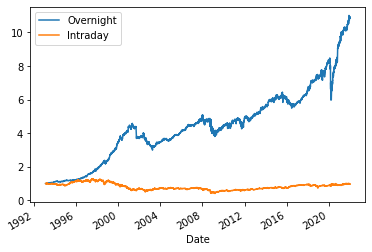

In [111]:
spy_cum_prod.plot();